## Continuous distributions

Plotting densities and histograms with scipy. We'll focus on normal and uniform distributions

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng()

### First, recap with binomial

In [3]:
d = pd.DataFrame({'x': range(6)}).assign(prob = lambda d: stats.binom.pmf(d.x, 5, .5))

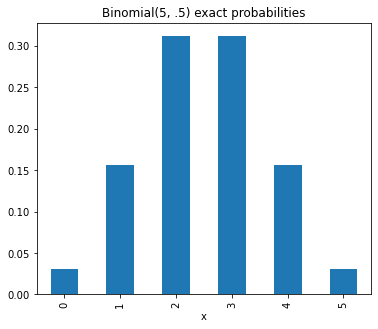

In [4]:
d.plot.bar(x = 'x', y = 'prob', figsize = (6, 5), legend = False, title = 'Binomial(5, .5) exact probabilities')
plt.savefig('images/binom_pmf.jpeg')

### Uniform

In [5]:
# all the same!
stats.uniform.pdf(np.linspace(0, 1, 100))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

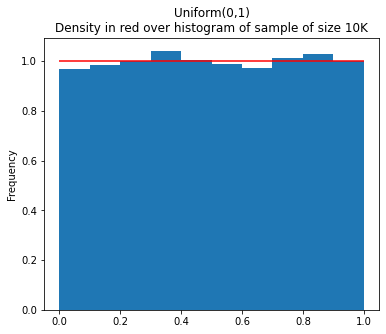

In [6]:
pd.Series(stats.uniform.rvs(0, 1, 10000)).plot.hist(density = True, bins = 10, figsize = (6, 5),
                                                  title = 'Uniform(0,1)\nDensity in red over histogram of sample of size 10K').hlines(xmax = 0, xmin = 1, y = 1, color = 'red')
plt.savefig('images/uniform.jpeg')

In [7]:
# this is also uniform
rng.random(10)

array([0.60107362, 0.83685456, 0.93791076, 0.58699798, 0.81247354,
       0.73757782, 0.90696613, 0.05479895, 0.65937385, 0.4835174 ])

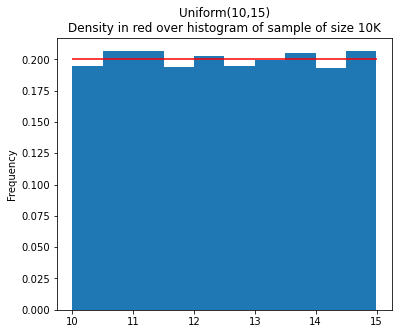

In [17]:
pd.Series(stats.uniform.rvs(10, 5, 10000)).plot.hist(density = True, bins = 10, figsize = (6, 5),
                                                  title = 'Uniform(10,15)\nDensity in red over histogram of sample of size 10K').hlines(xmax = 15, xmin = 10, y = 1/5, color = 'red')
plt.savefig('images/uniform_ab.jpeg')

### Normal

In [9]:
def plotnorm(m, s):
    ax = pd.Series(stats.norm.rvs(m, s, 10000)).plot.hist(density = True, bins = 20, figsize = (6, 5),
                                                  title = f'Normal({m},{s})\nDensity in red over histogram of sample of size 10K')
    return pd.DataFrame({'x': np.linspace(m-4*s, m+4*s, 100)}).assign(prob = lambda d: stats.norm.pdf(d.x, m, s)).plot.line(x = 'x', y = 'prob', color = 'red', ax = ax, legend = False)

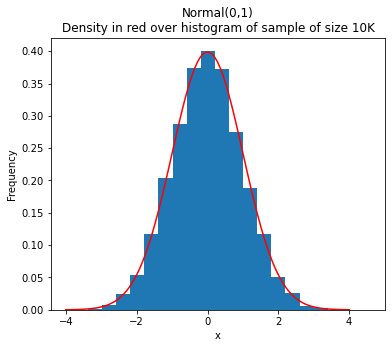

In [10]:
plotnorm(0, 1)

plt.savefig('images/normal.jpeg')

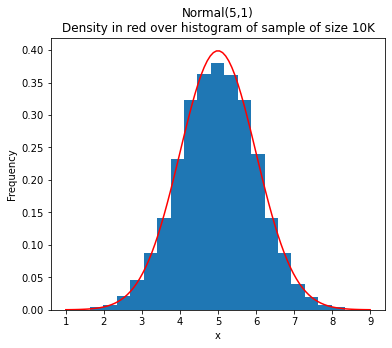

In [11]:
plotnorm(5, 1)

plt.savefig('images/normal_shift.jpeg')

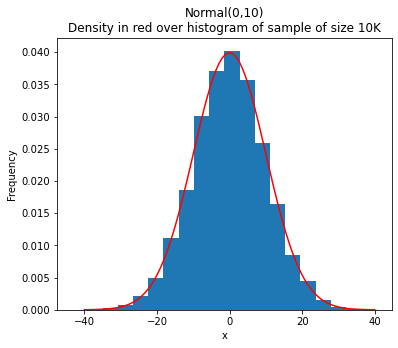

In [12]:
plotnorm(0, 10)

plt.savefig('images/normal_wide.jpeg')

In [13]:
x = rng.standard_normal(int(1e5))

<function matplotlib.pyplot.show(close=None, block=None)>

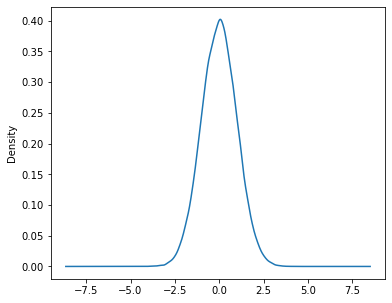

In [14]:
pd.Series(x).plot.density(figsize = (6, 5))
plt.show